### **Packages:**


---




In [0]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### **Data setup**:


---

In [0]:
!mkdir data

In [3]:
!pip install kaggle

In [9]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
# token = {'username':'hemantkshirsagar8','key':''}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [14]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [16]:
!kaggle competitions download -c mlsp-2014-mri -p /content/data

  0% 0.00/2.04k [00:00<?, ?B/s]
100% 2.04k/2.04k [00:00<00:00, 6.07MB/s]
  0% 0.00/121k [00:00<?, ?B/s]
100% 121k/121k [00:00<00:00, 37.7MB/s]
 99% 189M/192M [00:05<00:00, 27.0MB/s]
100% 192M/192M [00:05<00:00, 34.5MB/s]
  0% 0.00/287k [00:00<?, ?B/s]
100% 287k/287k [00:00<00:00, 92.8MB/s]
 35% 5.00M/14.3M [00:00<00:00, 19.6MB/s]
100% 14.3M/14.3M [00:00<00:00, 47.5MB/s]


In [17]:
!unzip /content/data/\*.zip -d /content/data/

Archive:  /content/data/Train.zip
  inflating: /content/data/train_FNC.csv  
  inflating: /content/data/train_labels.csv  
  inflating: /content/data/train_SBM.csv  

Archive:  /content/data/submission_example.csv.zip
  inflating: /content/data/submission_example.csv  

Archive:  /content/data/HelperCode.zip
  inflating: /content/data/load_features.R  
  inflating: /content/data/load_features.m  

Archive:  /content/data/Test.zip
  inflating: /content/data/test_FNC.csv  
  inflating: /content/data/test_SBM.csv  

Archive:  /content/data/AdditionalInformation.zip
  inflating: /content/data/load_maps.R  
  inflating: /content/data/gm_sMRI_ica_maps.pdf  
  inflating: /content/data/rs_fMRI_ica_maps.pdf  
  inflating: /content/data/aal_labels_naming.m  
  inflating: /content/data/load_AAL.m  
  inflating: /content/data/load_maps.m  
  inflating: /content/data/show_maps.m  
  inflating: /content/data/comp_ind_fMRI.csv  
  inflating: /content/data/comp_ind_sMRI.csv  
  inflating: /content/dat

In [0]:
!rm -r /content/data/*.zip
# !rm -r /content/data/*.m
# !rm -r /content/data/*.R
# !rm -r /content/data/*.nii

### **About Data:**



---



**Train.zip:**

**train_labels.csv** - Labels for the training set. The labels are indicated in the "Class" column. 0 = 'Healthy Control', 1 = 'Schizophrenic Patient'

**train_FNC.csv** - FNC features for the training set. These are correlation values. They describe the connection level between pairs of brain maps over time.

**train_SBM.csv** - SBM features for the training set. These are standardized weights. They describe the expression level of ICA brain maps derived from gray-matter concentration.

**Test.zip:**

**test_FNC.csv** - FNC features for the test set. Test subject labels have been removed. Your task is to predict these unknown labels from the provided features.

**test_SBM.csv** - SBM features for the test set. Test subject labels have been removed.


**About FNC Features:**

Functional Network Connectivity (FNC) are correlation values that summarize the overall connection between independent brain maps over time. Therefore, the FNC feature gives a picture of the connectivity pattern over time between independent networks (or brain maps). The provided FNC information was obtained from functional magnetic resonance imaging (fMRI) from a set of schizophrenic patients and healthy controls at rest, using group independent component analysis (GICA). The GICA decomposition of the fMRI data resulted in a set of brain maps, and corresponding timecourses. 

These timecourses indicated the activity level of the corresponding brain map at each point in time. The FNC feature are the correlations between these timecourses. In a way, FNC indicates a subject's overall level of 'synchronicity' between brain areas. Because this information is derived from functional MRI scans, FNCs are considered a functional modality feature (i.e., they describe patterns of the brain function). More about FNCs can be found here: [FNC paper](http://cercor.oxfordjournals.org/content/early/2012/11/09/cercor.bhs352.abstract).

**About SBM Loadings:**

Source-Based Morphometry (SBM) loadings correspond to the weights of brain maps obtained from the application of independent component analysis (ICA) on the gray-matter concentration maps of all subjects. Gray-matter corresponds to the outer-sheet of the brain; it is the brain region in which much of the brain signal processing actually occurs. In a way, the concentration of gray-matter is indicative of the "computational power" available in a certain region of the brain. Processing gray-matter concentration maps with ICA yields independent brain maps whose expression levels (i.e., loadings) vary across subjects. 

Simply put, a near-zero loading for a given ICA-derived brain map indicates that the brain regions outlined in that map are lowly present in the subject (i.e., the gray-matter concentration in those regions are very low in that subject). Because this information is derived from structural MRI scans, SBM loadings are considered a structural modality feature (i.e., they describe patterns of the brain structure). More about SBM loadings can be found here: [SBM paper](http://www.ncbi.nlm.nih.gov/pubmed/22470337).

Further details about data can be found here, at [kaggle competition](https://www.kaggle.com/c/mlsp-2014-mri/data).


Done.

### **Data Analysis:**


---



In [0]:
train_FNC = pd.read_csv('./data/train_FNC.csv')
train_SBM = pd.read_csv('./data/train_SBM.csv')
y = pd.read_csv('./data/train_labels.csv')

In [311]:
train_FNC.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,...,FNC339,FNC340,FNC341,FNC342,FNC343,FNC344,FNC345,FNC346,FNC347,FNC348,FNC349,FNC350,FNC351,FNC352,FNC353,FNC354,FNC355,FNC356,FNC357,FNC358,FNC359,FNC360,FNC361,FNC362,FNC363,FNC364,FNC365,FNC366,FNC367,FNC368,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,0.477620,0.165250,0.152740,0.270490,-0.023773,0.057374,-0.13873,0.24606,-0.036653,0.055729,0.195540,0.11568,0.353010,0.33846,0.22753,-0.065594,0.086119,-0.116460,0.41478,-0.35864,0.036615,0.35761,0.57461,0.21516,-0.156410,0.069346,0.39911,-0.086613,0.054857,0.192330,...,-0.29504,0.10551,0.30505,0.432070,0.556880,0.46394,0.018254,-0.188530,0.086159,-0.238100,0.25122,0.58942,0.542530,0.183010,-0.23049,0.093536,-0.024040,0.470320,0.29130,0.098155,0.047888,-0.134690,-0.23674,0.348840,0.40354,0.28671,0.27811,0.31830,0.37908,-0.060204,0.18743,0.163770,0.17686,0.074728,0.148600,0.343230,0.17565,0.52035,0.030613,0.30774
1,135376,0.28790,0.102570,-0.32343,-0.22776,0.12328,0.367020,-0.084040,0.038793,-0.006287,0.101690,-0.376340,0.142640,-0.088119,-0.056629,-0.479970,0.25017,0.20565,0.100910,0.090710,-0.041637,-0.33688,0.223350,0.19753,0.40784,0.221110,-0.017778,-0.019428,0.62700,0.48108,0.450290,0.45691,0.19346,0.70298,0.685360,0.543640,0.67527,0.244000,0.512400,0.396410,...,0.47717,0.27306,0.71654,0.561570,-0.091094,0.11545,0.420580,0.631940,0.731340,-0.274750,0.59071,0.83211,-0.032933,-0.025029,-0.31699,-0.094311,0.294930,0.188810,0.01650,0.210740,0.456090,0.091578,-0.47742,0.013968,0.20574,0.48151,0.49290,0.21511,0.44880,0.369300,0.59834,-0.477880,0.26634,0.582940,-0.041272,0.630050,0.70314,0.36383,-0.207880,0.64138
2,139149,0.24585,0.216620,-0.12468,-0.35380,0.16150,-0.002032,-0.133020,-0.035222,0.259040,-0.045302,-0.027871,0.424240,-0.361020,-0.256640,0.013372,0.24679,0.06869,0.122810,-0.491070,-0.016317,-0.29430,0.189520,0.37337,-0.33428,0.532240,-0.059252,-0.376230,0.46884,0.22889,0.203270,0.22383,0.31407,0.51565,0.079927,0.114280,0.35020,0.262910,0.018740,0.051793,...,-0.36236,0.32105,0.37874,-0.258550,-0.312070,0.59020,0.449510,0.041927,0.729640,-0.592430,0.32563,0.75814,0.075444,-0.420990,-0.17144,-0.175620,0.041856,0.042524,-0.34176,0.377860,0.071924,0.539140,-0.55848,0.152460,0.45270,0.55959,0.46717,-0.15872,0.17388,0.521330,0.22866,-0.000816,0.25860,0.280450,-0.644640,0.332440,0.87074,-0.10973,-0.679160,0.32316
3,146791,0.42090,0.331380,0.24453,0.17167,0.59223,0.431050,0.280290,0.289620,0.356800,0.286340,0.048550,-0.080789,-0.060777,0.260040,0.154730,0.16130,0.21598,0.153080,0.503730,0.148900,0.18326,0.021985,0.40514,0.52879,0.300160,0.323960,0.328850,0.74485,0.70518,0.658060,0.54178,0.38055,0.64302,0.298820,0.589520,0.53017,0.485810,0.574150,0.509770,...,-0.24084,0.50273,0.76808,-0.075026,0.190440,0.45596,0.161080,0.449680,0.609100,0.177100,0.42164,0.57511,0.521790,0.735700,0.27329,0.207670,0.425530,0.244690,0.23583,0.493320,0.599920,0.312640,0.26743,0.279880,0.42898,0.39231,0.13384,0.49211,0.34309,0.144460,0.42881,0.711570,0.56593,0.248560,0.153860,0.093171,0.62556,0.60391,-0.058301,0.10779
4,153870,-0.14621,-0.468630,-0.52880,-0.50381,-0.51052,-0.029113,-0.015192,0.360170,0.005944,0.024801,-0.031034,0.559150,0.048705,0.156080,0.008678,0.62856,0.55702,0.191120,0.040825,0.373060,-0.44247,0.119220,-0.34615,-0.51165,0.452220,-0.160560,-0.606830,0.28326,0.21766,0.158000,0.24057,0.28307,0.25707,-0.072729,0.152580,0.13349,-0.105510,-0.234190,0.183910,...,-0.39077,0.51207,0.29410,-0.453800,0.073685,0.18873,0.128680,-0.276260,0.202700,-0.045402,0.15311,0.20027,-0.353570,0.396270,-0.49929,-0.618850,0.569730,-0.323330,-0.57656,-0.286060,0.378360,0.753900,-0.84422,0.333820,0.68311,-0.23637,-0.35586,0.44029,-0.40981,-0.179310,0.41688,-0.435600

In [312]:
train_SBM.head()

,Id,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,120873,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,0.339658,0.137624,0.098926,-0.179555,-1.257417,-0.426855,-1.062109,0.866065,-0.409747,-0.388249,1.641117,0.439271,0.791762,-0.078220,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006
1,135376,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,-0.672254,0.972934,-0.177950,0.742952,1.175508,0.083895,0.044317,1.154924,1.034574,-0.612464,0.516993,-0.875616,-0.073326,0.989571,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125
2,139149,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,-2.132901,-1.488153,-0.202826,2.034083,0.323568,-1.676738,0.414747,0.498362,-1.212714,1.249961,0.507938,1.360176,-0.910225,-0.257114,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434
3,146791,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,-1.269851,0.187573,-0.355915,0.064853,0.159363,-2.018822,-0.026555,-0.732960,-0.981925,0.440149,-3.060313,-0.331995,-3.013096,-0.295110,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966
4,153870,-0.208685,-0.562697,-0.362164,1.025571,0.151690,-0.130410,-1.105922,0.502029,-0.097735,1.561833,1.961955,-0.420548,0.956431,-0.873050,0.673888,-1.027496,-0.012389,0.082437,1.293312,0.577215,-0.499647,0.474353,1.342273,-0.978412,0.158492,0.889753,0.795368,0.738788,0.475415,2.340384,2.516038,-0.551440


In [313]:
y.head()

,Id,Class
0,120873,1
1,135376,0
2,139149,0
3,146791,0
4,153870,1


In [0]:
test_FNC = pd.read_csv('./data/test_FNC.csv')
test_SBM = pd.read_csv('./data/test_SBM.csv')
comp_ind_fMRI = pd.read_csv('./data/comp_ind_fMRI.csv')
comp_ind_sMRI = pd.read_csv('./data/comp_ind_sMRI.csv')
rs_fMRI_FNC_mapping = pd.read_csv('./data/rs_fMRI_FNC_mapping.csv')

In [315]:
test_FNC.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,...,FNC339,FNC340,FNC341,FNC342,FNC343,FNC344,FNC345,FNC346,FNC347,FNC348,FNC349,FNC350,FNC351,FNC352,FNC353,FNC354,FNC355,FNC356,FNC357,FNC358,FNC359,FNC360,FNC361,FNC362,FNC363,FNC364,FNC365,FNC366,FNC367,FNC368,FNC369,FNC370,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378
0,100004,0.476127,0.064466,0.053238,-0.608133,0.073988,-0.637039,0.113556,-0.192434,-0.004025,-0.060474,-0.256244,-0.239706,0.113166,-0.136103,-0.322507,0.299439,0.492948,0.233049,-0.312542,0.210541,-0.521582,0.323302,-0.161545,-0.122164,0.369105,0.640831,0.041661,0.196605,0.128142,0.304551,0.352879,0.416197,0.678723,0.277782,0.676364,-0.133499,0.102174,0.022148,0.136891,...,-0.323568,0.415299,0.580612,-0.296234,0.700717,-0.098439,0.185673,0.380953,0.433161,-0.405556,0.374340,0.495940,-0.059396,0.136818,-0.483997,0.555808,-0.356607,0.100753,-0.320402,-0.112517,0.460471,0.386452,-0.073664,0.001062,0.153605,0.734810,0.317646,-0.097210,-0.122540,0.150698,0.482131,0.022525,-0.034251,-0.103903,-0.497701,0.079286,0.265937,0.379066,-0.630483,-0.309032
1,100015,0.013833,0.267183,0.232178,-0.167151,-0.261327,0.191869,0.406493,0.088761,0.177048,0.036718,-0.656346,0.415506,-0.054457,-0.401238,-0.321115,0.186433,0.585713,0.437911,-0.307749,-0.029330,-0.134603,-0.289691,0.009930,0.603237,-0.005077,0.381680,-0.135795,0.187608,0.716543,0.315034,-0.408325,0.617800,0.770686,0.181813,0.787717,0.605197,0.366940,-0.299074,0.421012,...,-0.377365,0.286297,0.682911,0.095391,0.388988,0.311717,-0.231560,0.310637,0.782427,0.009134,0.152884,0.510705,0.463462,0.043892,-0.252089,0.079247,-0.426585,0.385604,0.623455,0.286064,0.263112,0.218903,-0.589047,-0.113545,0.311255,0.030508,0.380939,0.297206,0.537560,0.318086,0.387964,0.288442,0.503947,-0.221215,-0.949426,0.340575,0.767685,0.417164,0.194081,-0.218685
2,100026,-0.435452,0.046780,0.243742,0.397030,-0.147821,0.173620,-0.461963,-0.610736,0.419753,0.400985,-0.220077,0.287517,0.002372,-0.332512,0.008532,0.366046,0.562904,0.238146,0.014265,-0.425968,-0.499350,0.067169,0.292784,0.211195,0.563133,0.231455,-0.313893,0.561810,-0.012589,-0.108333,0.608448,0.309184,-0.058818,0.137444,0.316538,0.058696,0.081580,0.113453,-0.623393,...,-0.701107,0.416079,0.510617,0.125767,-0.218539,0.609401,0.073030,0.217984,0.485754,0.040364,0.600444,-0.003409,0.268395,-0.213212,0.294130,-0.090743,0.051929,0.244618,0.234822,0.167235,0.324517,0.168946,0.434138,0.008318,-0.315736,0.485861,0.731697,-0.249642,-0.361329,0.093333,-0.388256,0.052361,0.759901,0.478927,-0.164136,-0.096020,0.607880,0.099879,-0.429554,0.453645
3,100030,-0.204510,-0.036735,-0.760705,-0.740495,0.064668,0.349926,-0.273826,-0.174384,-0.120248,0.175618,-0.122505,0.379375,0.040945,0.106041,-0.150561,0.114257,0.553867,-0.371839,-0.495213,-0.274343,-0.496839,0.405451,0.293438,0.546172,-0.355862,-0.053801,-0.492059,0.082710,0.113686,0.675230,-0.263651,0.451183,0.537128,-0.226750,0.124338,0.304847,0.073727,0.278834,0.279822,...,-0.498579,-0.230756,0.376818,-0.510979,0.136534,-0.190452,0.526877,-0.316290,0.570783,-0.119866,-0.107237,0.632972,-0.376752,0.727788,-0.270263,-0.712554,0.202652,-0.372602,0.049370,-0.717746,0.392160,0.719406,-0.526902,0.461217,0.267554,0.314762,0.682848,0.291971,0.462893,0.442313,0.406804,0.169224,0.001855,0.324120,-0.212088,0.344033,0.234451,0.214809,-0.138947,0.436006
4,100047,0.599435,-0.166441,0.122431,0.011539,0.346906,-0.017430,-0.274734,0.211510,0.151012,-0.033434,-0.286008,-0.024012,-0.245284,-0.280592,-0.278775,0.555220,-0.241175,-0.184943,0.558418,-0.313958,0.044287,0.554710,0.249658,0.594015,-0.245845,-0.426244,0.252298,0.023092,0.672685,0.624100,0.080206,0.622279,0.294196,0.088422,0.332166,0.467401,0.447499,0.264495,0.373256,...,-0.490835,0.626051,-0.352886,-0.072454,0.234495,0.436001,0.459640,-0.428985,0.357173,0.026662,0.50874

In [316]:
test_SBM.head()

,Id,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,100004,1.154881,3.627246,0.146076,-0.677521,0.951169,0.482531,-2.404130,-0.715182,-0.475299,-0.896095,2.256762,0.567271,0.796897,-0.617875,0.616627,-2.011786,-0.514364,-0.000241,0.025560,-0.184531,-0.538563,0.139369,-0.451994,1.123770,2.083006,1.145440,-0.067608,1.202529,0.851587,0.451583,-0.159739,0.192076
1,100015,-1.608977,-0.125656,2.232224,1.013575,1.227375,0.296077,-0.612468,-1.610222,-0.136698,0.039142,1.711094,0.908302,-0.930560,-0.900517,-0.865214,0.185261,0.726653,1.492725,-1.508538,1.732360,4.317689,-2.084801,0.696987,1.397832,1.046136,-0.191733,-2.192023,-0.369276,0.822225,-0.109342,-0.580476,0.174160
2,100026,1.611464,1.859449,-0.959714,-0.713587,0.826513,-0.405989,-0.752907,-0.484180,-1.212576,0.679237,1.386814,0.974427,-0.362832,0.106783,-0.136973,-0.123830,0.589357,0.867600,2.357174,-1.374768,-1.572011,0.046525,0.160145,1.906989,-2.661633,-0.193911,0.440873,0.641739,0.918397,-0.758046,0.154702,-0.476647
3,100030,-0.283111,-0.418010,1.962834,-0.342130,-0.939108,0.929705,1.041755,-1.073416,-0.815344,-1.945322,-0.949757,1.275905,-1.389023,0.561610,2.226175,0.167515,0.375615,-0.318241,-2.162269,-0.135170,0.553775,-1.693663,0.974828,-1.997087,-2.083782,1.154107,-0.643947,2.332424,0.659124,-0.809445,0.558960,2.790871
4,100047,-0.688717,1.951002,1.512576,-0.854993,1.059652,-0.179238,-1.775324,0.649346,1.616116,0.985532,0.415556,-0.063359,1.356835,1.181061,-1.149081,2.410666,-0.125726,-2.925785,1.400921,-0.319947,1.480964,0.021838,-0.789153,1.578984,1.402592,-1.230440,0.296686,2.806314,0.427184,-0.240682,-0.196948,-1.544345


In [317]:
comp_ind_fMRI.head()

,fMRI_comp_ind
0,7
1,17
2,20
3,21
4,23


In [318]:
comp_ind_sMRI.head()

,sMRI_comp_ind
0,1
1,2
2,3
3,4
4,5


In [319]:
rs_fMRI_FNC_mapping.head()

,FNC,mapA,mapB
0,1,21,17
1,2,21,7
2,3,21,23
3,4,21,24
4,5,21,38


In [0]:
train = pd.merge(train_FNC, train_SBM, how='left', on='Id')
test = pd.merge(test_FNC, test_SBM, how='left', on='Id')

In [321]:
train.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,...,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,0.477620,0.165250,0.152740,0.270490,-0.023773,0.057374,-0.13873,0.24606,-0.036653,0.055729,0.195540,0.11568,0.353010,0.33846,0.22753,-0.065594,0.086119,-0.116460,0.41478,-0.35864,0.036615,0.35761,0.57461,0.21516,-0.156410,0.069346,0.39911,-0.086613,0.054857,0.192330,...,0.17686,0.074728,0.148600,0.343230,0.17565,0.52035,0.030613,0.30774,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,0.339658,0.137624,0.098926,-0.179555,-1.257417,-0.426855,-1.062109,0.866065,-0.409747,-0.388249,1.641117,0.439271,0.791762,-0.078220,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006
1,135376,0.28790,0.102570,-0.32343,-0.22776,0.12328,0.367020,-0.084040,0.038793,-0.006287,0.101690,-0.376340,0.142640,-0.088119,-0.056629,-0.479970,0.25017,0.20565,0.100910,0.090710,-0.041637,-0.33688,0.223350,0.19753,0.40784,0.221110,-0.017778,-0.019428,0.62700,0.48108,0.450290,0.45691,0.19346,0.70298,0.685360,0.543640,0.67527,0.244000,0.512400,0.396410,...,0.26634,0.582940,-0.041272,0.630050,0.70314,0.36383,-0.207880,0.64138,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,-0.672254,0.972934,-0.177950,0.742952,1.175508,0.083895,0.044317,1.154924,1.034574,-0.612464,0.516993,-0.875616,-0.073326,0.989571,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125
2,139149,0.24585,0.216620,-0.12468,-0.35380,0.16150,-0.002032,-0.133020,-0.035222,0.259040,-0.045302,-0.027871,0.424240,-0.361020,-0.256640,0.013372,0.24679,0.06869,0.122810,-0.491070,-0.016317,-0.29430,0.189520,0.37337,-0.33428,0.532240,-0.059252,-0.376230,0.46884,0.22889,0.203270,0.22383,0.31407,0.51565,0.079927,0.114280,0.35020,0.262910,0.018740,0.051793,...,0.25860,0.280450,-0.644640,0.332440,0.87074,-0.10973,-0.679160,0.32316,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,-2.132901,-1.488153,-0.202826,2.034083,0.323568,-1.676738,0.414747,0.498362,-1.212714,1.249961,0.507938,1.360176,-0.910225,-0.257114,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434
3,146791,0.42090,0.331380,0.24453,0.17167,0.59223,0.431050,0.280290,0.289620,0.356800,0.286340,0.048550,-0.080789,-0.060777,0.260040,0.154730,0.16130,0.21598,0.153080,0.503730,0.148900,0.18326,0.021985,0.40514,0.52879,0.300160,0.323960,0.328850,0.74485,0.70518,0.658060,0.54178,0.38055,0.64302,0.298820,0.589520,0.53017,0.485810,0.574150,0.509770,...,0.56593,0.248560,0.153860,0.093171,0.62556,0.60391,-0.058301,0.10779,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,-1.269851,0.187573,-0.355915,0.064853,0.159363,-2.018822,-0.026555,-0.732960,-0.981925,0.440149,-3.060313,-0.331995,-3.013096,-0.295110,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966
4,153870,-0.14621,-0.468630,-0.52880,-0.50381,-0.51052,-0.029113,-0.015192,0.360170,0.005944,0.024801,-0.031034,0.559150,0.048705,0.156080,0.008678,0.62856,0.55702,0.191120,0.040825,0.373060,-0.44247,0.119220,-0.34615,-0.51165,0.452220,-0.160560,-0.606830,0.28326,0.21766,0.158000,0.24057,0.28307,0.25707,-0.072729,0.152580,0.13349,-0.105510,-0.234190,0.183910,...,0.32104,0.392960,-0.842430,0.425080,0.86509,-0.31281,-0.829640,0.24307,-0.208685,-0.562697,-0.362164,1.02

In [0]:
train = pd.merge(train, y, how='left', on='Id')

In [323]:
train.head()

,Id,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,...,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75,Class
0,120873,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,0.477620,0.165250,0.152740,0.270490,-0.023773,0.057374,-0.13873,0.24606,-0.036653,0.055729,0.195540,0.11568,0.353010,0.33846,0.22753,-0.065594,0.086119,-0.116460,0.41478,-0.35864,0.036615,0.35761,0.57461,0.21516,-0.156410,0.069346,0.39911,-0.086613,0.054857,0.192330,...,0.074728,0.148600,0.343230,0.17565,0.52035,0.030613,0.30774,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,0.339658,0.137624,0.098926,-0.179555,-1.257417,-0.426855,-1.062109,0.866065,-0.409747,-0.388249,1.641117,0.439271,0.791762,-0.078220,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006,1
1,135376,0.28790,0.102570,-0.32343,-0.22776,0.12328,0.367020,-0.084040,0.038793,-0.006287,0.101690,-0.376340,0.142640,-0.088119,-0.056629,-0.479970,0.25017,0.20565,0.100910,0.090710,-0.041637,-0.33688,0.223350,0.19753,0.40784,0.221110,-0.017778,-0.019428,0.62700,0.48108,0.450290,0.45691,0.19346,0.70298,0.685360,0.543640,0.67527,0.244000,0.512400,0.396410,...,0.582940,-0.041272,0.630050,0.70314,0.36383,-0.207880,0.64138,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,-0.672254,0.972934,-0.177950,0.742952,1.175508,0.083895,0.044317,1.154924,1.034574,-0.612464,0.516993,-0.875616,-0.073326,0.989571,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125,0
2,139149,0.24585,0.216620,-0.12468,-0.35380,0.16150,-0.002032,-0.133020,-0.035222,0.259040,-0.045302,-0.027871,0.424240,-0.361020,-0.256640,0.013372,0.24679,0.06869,0.122810,-0.491070,-0.016317,-0.29430,0.189520,0.37337,-0.33428,0.532240,-0.059252,-0.376230,0.46884,0.22889,0.203270,0.22383,0.31407,0.51565,0.079927,0.114280,0.35020,0.262910,0.018740,0.051793,...,0.280450,-0.644640,0.332440,0.87074,-0.10973,-0.679160,0.32316,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,-2.132901,-1.488153,-0.202826,2.034083,0.323568,-1.676738,0.414747,0.498362,-1.212714,1.249961,0.507938,1.360176,-0.910225,-0.257114,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434,0
3,146791,0.42090,0.331380,0.24453,0.17167,0.59223,0.431050,0.280290,0.289620,0.356800,0.286340,0.048550,-0.080789,-0.060777,0.260040,0.154730,0.16130,0.21598,0.153080,0.503730,0.148900,0.18326,0.021985,0.40514,0.52879,0.300160,0.323960,0.328850,0.74485,0.70518,0.658060,0.54178,0.38055,0.64302,0.298820,0.589520,0.53017,0.485810,0.574150,0.509770,...,0.248560,0.153860,0.093171,0.62556,0.60391,-0.058301,0.10779,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,-1.269851,0.187573,-0.355915,0.064853,0.159363,-2.018822,-0.026555,-0.732960,-0.981925,0.440149,-3.060313,-0.331995,-3.013096,-0.295110,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966,0
4,153870,-0.14621,-0.468630,-0.52880,-0.50381,-0.51052,-0.029113,-0.015192,0.360170,0.005944,0.024801,-0.031034,0.559150,0.048705,0.156080,0.008678,0.62856,0.55702,0.191120,0.040825,0.373060,-0.44247,0.119220,-0.34615,-0.51165,0.452220,-0.160560,-0.606830,0.28326,0.21766,0.158000,0.24057,0.28307,0.25707,-0.072729,0.152580,0.13349,-0.105510,-0.234190,0.183910,...,0.392960,-0.842430,0.425080,0.86509,-0.31281,-0.829640,0.24307,-0.208685,-0.562697,-0.362164,1.025571,0.151690,-0.130410,-1.105922

In [327]:
train.Class.unique()

array([1, 0])

In [0]:
y = pd.get_dummies(train['Class'], columns = ['y'], prefix = ['y'], drop_first = True)

In [329]:
y.head()

,['y']_1
0,1
1,0
2,0
3,0
4,1


In [330]:
train = train.iloc[:, 1:-1]
train.head()

,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,FNC40,...,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,0.34312,0.045761,-0.13112,0.15034,0.18082,0.289160,0.069545,-0.052489,0.124000,0.477620,0.165250,0.152740,0.270490,-0.023773,0.057374,-0.13873,0.24606,-0.036653,0.055729,0.195540,0.11568,0.353010,0.33846,0.22753,-0.065594,0.086119,-0.116460,0.41478,-0.35864,0.036615,0.35761,0.57461,0.21516,-0.156410,0.069346,0.39911,-0.086613,0.054857,0.192330,-0.365520,...,0.17686,0.074728,0.148600,0.343230,0.17565,0.52035,0.030613,0.30774,0.725065,-0.639254,0.353069,-0.981707,-1.419971,-0.441321,-0.264192,0.711579,0.641798,0.339658,0.137624,0.098926,-0.179555,-1.257417,-0.426855,-1.062109,0.866065,-0.409747,-0.388249,1.641117,0.439271,0.791762,-0.078220,-0.982331,1.070363,0.220316,0.776855,-2.022404,1.203256,1.083516,0.564201,-0.002006
1,0.28790,0.102570,-0.32343,-0.22776,0.12328,0.367020,-0.084040,0.038793,-0.006287,0.101690,-0.376340,0.142640,-0.088119,-0.056629,-0.479970,0.25017,0.20565,0.100910,0.090710,-0.041637,-0.33688,0.223350,0.19753,0.40784,0.221110,-0.017778,-0.019428,0.62700,0.48108,0.450290,0.45691,0.19346,0.70298,0.685360,0.543640,0.67527,0.244000,0.512400,0.396410,0.439300,...,0.26634,0.582940,-0.041272,0.630050,0.70314,0.36383,-0.207880,0.64138,-1.328855,0.502970,0.013232,1.128496,-0.070738,0.398476,-0.466051,-0.435455,0.342847,-0.672254,0.972934,-0.177950,0.742952,1.175508,0.083895,0.044317,1.154924,1.034574,-0.612464,0.516993,-0.875616,-0.073326,0.989571,-0.057543,0.371701,-0.513081,-0.457550,1.476216,0.381052,0.163436,0.403782,-0.295125
2,0.24585,0.216620,-0.12468,-0.35380,0.16150,-0.002032,-0.133020,-0.035222,0.259040,-0.045302,-0.027871,0.424240,-0.361020,-0.256640,0.013372,0.24679,0.06869,0.122810,-0.491070,-0.016317,-0.29430,0.189520,0.37337,-0.33428,0.532240,-0.059252,-0.376230,0.46884,0.22889,0.203270,0.22383,0.31407,0.51565,0.079927,0.114280,0.35020,0.262910,0.018740,0.051793,0.088855,...,0.25860,0.280450,-0.644640,0.332440,0.87074,-0.10973,-0.679160,0.32316,0.732268,-1.241554,0.654942,-0.289216,0.158316,0.029165,1.439242,-0.832816,1.285468,-2.132901,-1.488153,-0.202826,2.034083,0.323568,-1.676738,0.414747,0.498362,-1.212714,1.249961,0.507938,1.360176,-0.910225,-0.257114,0.597229,1.220756,-0.059213,-0.435494,-0.092971,1.090910,-0.448562,-0.508497,0.350434
3,0.42090,0.331380,0.24453,0.17167,0.59223,0.431050,0.280290,0.289620,0.356800,0.286340,0.048550,-0.080789,-0.060777,0.260040,0.154730,0.16130,0.21598,0.153080,0.503730,0.148900,0.18326,0.021985,0.40514,0.52879,0.300160,0.323960,0.328850,0.74485,0.70518,0.658060,0.54178,0.38055,0.64302,0.298820,0.589520,0.53017,0.485810,0.574150,0.509770,0.344040,...,0.56593,0.248560,0.153860,0.093171,0.62556,0.60391,-0.058301,0.10779,-0.343917,-1.052519,-1.150521,0.765989,0.923129,0.674052,-0.492673,1.282388,-1.914583,-1.269851,0.187573,-0.355915,0.064853,0.159363,-2.018822,-0.026555,-0.732960,-0.981925,0.440149,-3.060313,-0.331995,-3.013096,-0.295110,0.829697,-0.450726,-0.791032,-1.115821,-0.022296,-0.245844,-0.705539,0.061344,0.448966
4,-0.14621,-0.468630,-0.52880,-0.50381,-0.51052,-0.029113,-0.015192,0.360170,0.005944,0.024801,-0.031034,0.559150,0.048705,0.156080,0.008678,0.62856,0.55702,0.191120,0.040825,0.373060,-0.44247,0.119220,-0.34615,-0.51165,0.452220,-0.160560,-0.606830,0.28326,0.21766,0.158000,0.24057,0.28307,0.25707,-0.072729,0.152580,0.13349,-0.105510,-0.234190,0.183910,-0.127320,...,0.32104,0.392960,-0.842430,0.425080,0.86509,-0.31281,-0.829640,0.24307,-0.208685,-0.562697

### **Model building**

Backup Score data frame

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.30, random_state = 42)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
k_fold = KFold(n_splits=15, shuffle=True, random_state=42) #changed k-10 to 15

In [332]:
y_test.head()

,['y']_1
75,0
0,1
70,0
22,0
12,1


In [333]:
X_train.head()

,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,FNC40,...,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
5,0.558360,0.35646,0.357290,0.28911,0.276200,0.442630,0.31844,-0.110290,0.302120,0.055681,0.071205,0.123100,0.005568,-0.244090,0.040485,0.215870,0.436410,0.31318,0.014873,0.64977,-0.214010,0.33231,0.213110,0.297710,0.578960,0.599060,-0.33018,0.846240,0.854700,0.829260,0.72549,0.70377,0.84619,0.53428,0.766080,0.67665,0.006915,0.69635,0.63434,0.272670,...,0.439820,0.419510,0.272840,0.45713,0.16197,0.81398,-0.205100,-0.062817,-0.009534,-0.371165,-0.348090,0.994007,1.113957,-1.847218,0.244621,-1.575156,1.425686,-1.369232,0.240540,-1.618921,-0.591007,-2.830852,-1.173365,1.277215,-1.629046,-0.355655,-0.679073,-0.305937,-0.264168,-0.446783,-0.030834,1.304894,0.835378,-0.741826,-0.206366,0.476910,1.693937,1.269684,0.681868,1.511061
39,-0.020402,-0.50034,-0.545000,-0.15271,-0.052189,-0.501450,-0.37674,0.025908,0.334400,-0.094400,0.362140,0.331040,-0.329850,-0.267450,0.357090,-0.327580,-0.568170,-0.45501,-0.207510,0.26197,-0.561870,0.21540,-0.525670,0.070296,-0.323640,-0.563250,0.15442,-0.040841,0.061286,0.005619,-0.17621,0.22918,0.29531,-0.33272,-0.008726,-0.11419,0.065162,0.05568,-0.28988,-0.133210,...,0.704380,-0.063927,-0.256670,0.24877,0.26874,0.31593,-0.393940,-0.054448,0.380677,-0.359733,1.472353,0.589395,-0.362399,-0.057072,0.924842,-0.741507,-0.290346,0.331766,-1.190072,-0.566882,-0.180682,0.664304,0.181391,-0.136786,-0.639082,-0.136514,0.159089,0.070068,0.915640,-0.532977,1.310820,-0.562974,-0.290199,0.463311,0.879838,-0.991017,-0.115552,-0.915954,-2.215187,-0.999732
31,0.216780,0.27011,0.087964,-0.30365,0.592750,-0.170640,-0.14309,-0.471900,-0.180450,0.105680,0.214920,0.001104,-0.267680,-0.302190,-0.002465,0.196530,0.197060,0.40524,0.251630,-0.31243,-0.331500,0.57221,0.695030,-0.156090,0.597660,0.048005,-0.12048,0.619660,0.653280,0.563660,0.52100,0.41551,0.46231,0.41557,0.360570,0.13927,0.476920,0.48525,0.33264,-0.137760,...,0.008267,0.110380,-0.319520,0.44475,0.73124,-0.26576,-0.095001,0.352000,0.319263,0.637603,-0.628579,2.633859,1.334900,-0.670727,1.428378,-2.221669,-1.229499,-0.198677,-1.001227,-1.077524,-0.844440,-1.072111,1.251939,-1.031406,0.171302,-0.307434,1.093092,-0.012375,-0.477362,0.117850,-1.527436,-0.014958,-0.682168,0.114895,1.148412,0.434126,1.696830,-0.434430,0.094033,-0.119103
35,-0.220060,0.11208,-0.543660,-0.44151,0.196480,-0.094394,-0.34161,0.110480,0.248460,0.629010,-0.334230,0.454090,-0.336000,0.140740,-0.123200,0.118820,0.492910,0.49291,-0.492670,0.29107,-0.409970,-0.10493,-0.169650,-0.522110,-0.069810,0.299910,-0.26439,0.593540,0.767110,0.818590,0.53159,0.27017,0.67894,0.23950,0.017597,-0.31638,0.335470,-0.39863,0.41374,0.173100,...,0.157070,0.480270,-0.009697,0.11384,0.77176,-0.10256,0.045402,0.304540,0.574997,0.194515,-0.266999,-0.555108,0.140001,0.444743,1.535313,-0.241399,1.040510,-0.797836,-1.112826,-0.284600,-1.423257,1.730194,-0.138311,2.298306,2.141247,0.325165,0.492088,-0.009645,1.794206,-1.328535,1.369168,0.190709,1.363136,0.104642,0.003377,-0.119545,1.487001,-0.202125,-0.884001,1.142243
45,-0.174850,-0.11984,-0.366770,-0.35405,0.065508,-0.085309,-0.29560,0.311750,-0.013669,0.513440,-0.017505,0.549100,0.441590,-0.023519,0.402520,0.062671,-0.087175,0.12973,0.072483,0.50632,-0.045255,0.12306,-0.044503,-0.025637,-0.005029,0.128940,-0.36609,0.635530,0.511020,0.531390,0.53493,0.56809,0.47644,-0.11452,0.515880,-0.22781,0.198670,-0.38383,-0.10503,-0.054571,...,0.073327,0.213710,0.484390,0.43588,0.16190,0.

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [0]:
X_train_LR = X_train
y_train_LR = y_train
X_test_LR = X_test
y_test_LR = y_test

In [0]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
grid_obj = GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [0]:
grid_fit = grid_obj.fit(X_train_LR, y_train_LR)

In [0]:
best_clf = grid_fit.best_estimator_

In [398]:
best_clf

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [425]:
# logmodel = LogisticRegression() 
logmodel = LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
logmodel.fit(X_train_LR,y_train_LR)
logpred = logmodel.predict(X_test_LR)


print(confusion_matrix(y_test_LR, logpred))
print('Accuracy: ', round(accuracy_score(y_test_LR, logpred),2)*100)
LOGREC = round(recall_score(y_test_LR, logpred),2)*100
print('Recall: ', round(recall_score(y_test_LR, logpred),2)*100)
print('Precision: ', round(precision_score(y_test_LR, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train_LR, y_train_LR, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print('CV_Score', LOGCV)

[[6 8]
 [4 8]]
Accuracy:  54.0
Recall:  67.0
Precision:  50.0
CV_Score 0.7666666666666667


k=1 56.67 (+/- 26.03)
k=2 51.67 (+/- 27.34)
k=3 51.67 (+/- 28.33)
k=4 58.33 (+/- 28.14)
k=5 58.33 (+/- 29.11)
k=6 55.00 (+/- 23.63)
k=7 61.67 (+/- 23.63)
k=8 60.00 (+/- 17.00)
k=9 66.67 (+/- 19.72)
k=10 65.00 (+/- 17.40)
k=11 60.00 (+/- 13.33)
k=12 56.67 (+/- 26.03)
k=13 65.00 (+/- 17.40)
k=14 63.33 (+/- 22.11)
k=15 63.33 (+/- 17.95)
k=16 60.00 (+/- 21.34)
k=17 58.33 (+/- 25.00)
k=18 56.67 (+/- 22.61)
k=19 58.33 (+/- 18.63)
k=20 63.33 (+/- 24.49)
k=21 63.33 (+/- 22.11)
k=22 60.00 (+/- 21.34)
k=23 65.00 (+/- 21.67)
k=24 61.67 (+/- 22.42)
k=25 63.33 (+/- 22.11)
The optimal number of neighbors is 8 with 66.7%


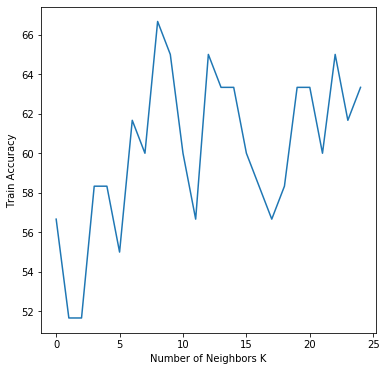

In [426]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(train, y, test_size = 0.3, random_state = 42)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 15-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [427]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print('Accuracy: ', round(accuracy_score(y_test, knnpred),2)*100)
KNNREC = round(recall_score(y_test_LR, knnpred),2)*100
print('Recall: ', round(recall_score(y_test, knnpred),2)*100)
print('Precision: ', round(precision_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[11  3]
 [ 8  4]]
Accuracy:  57.99999999999999
Recall:  33.0
Precision:  56.99999999999999


In [0]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.0001, 0.001, 0.01, 0.1, 1, 1.5, 10]
    gammas = [0.0001, 0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='sigmoid'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [429]:
svc_param_selection(X_train, y_train, 15)

{'C': 1, 'gamma': 0.1}

In [430]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
# svc= SVC(kernel = 'sigmoid', C = 1, gamma = 0.1)
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print('Accuracy: ', round(accuracy_score(y_test, svcpred),2)*100)
SVCREC = round(recall_score(y_test, svcpred),2)*100
print('Recall: ', round(recall_score(y_test, svcpred),2)*100)
print('Precision: ', round(precision_score(y_test, svcpred),2)*100)

SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("CV_Score", SVCCV)

[[7 7]
 [4 8]]
Accuracy:  57.99999999999999
Recall:  67.0
Precision:  53.0
CV_Score 0.7833333333333333


In [431]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
# print(round(accuracy_score(y_test, dtreepred),2)*100)
print('Accuracy: ', round(accuracy_score(y_test, dtreepred),2)*100)
DTREEREC = round(recall_score(y_test, dtreepred),2)*100
print('Recall: ', round(recall_score(y_test, dtreepred),2)*100)
print('Precision: ', round(precision_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7 7]
 [4 8]]
Accuracy:  57.99999999999999
Recall:  67.0
Precision:  53.0


In [432]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
# print(round(accuracy_score(y_test, rfcpred),2)*100)

print('Accuracy: ', round(accuracy_score(y_test, rfcpred),2)*100)
RFCREC = round(recall_score(y_test, rfcpred),2)*100
print('Recall: ', round(recall_score(y_test, rfcpred),2)*100)
print('Precision: ', round(precision_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[8 6]
 [4 8]]
Accuracy:  62.0
Recall:  67.0
Precision:  56.99999999999999


In [433]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
# print(round(accuracy_score(y_test, gaussiannbpred),2)*100)

print('Accuracy: ', round(accuracy_score(y_test, gaussiannbpred),2)*100)
GUASIANREC = round(recall_score(y_test, gaussiannbpred),2)*100
print('Recall: ', round(recall_score(y_test, gaussiannbpred),2)*100)
print('Precision: ', round(precision_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("CV_Score", GAUSIAN)

[[6 8]
 [4 8]]
Accuracy:  54.0
Recall:  67.0
Precision:  50.0
CV_Score 0.75


In [434]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print('Accuracy: ', round(accuracy_score(y_test, xgbprd),2)*100)
XGBREC = round(recall_score(y_test, xgbprd),2)*100
print('Recall: ', round(recall_score(y_test, xgbprd),2)*100)
print('Precision: ', round(precision_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[8 6]
 [4 8]]
Accuracy:  62.0
Recall:  67.0
Precision:  56.99999999999999


In [435]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
# print(round(accuracy_score(y_test, gbkpred),2)*100)

print('Accuracy: ', round(accuracy_score(y_test, gbkpred),2)*100)
GBKREC = round(recall_score(y_test, gbkpred),2)*100
print('Recall: ', round(recall_score(y_test, gbkpred),2)*100)
print('Precision: ', round(precision_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7 7]
 [4 8]]
Accuracy:  57.99999999999999
Recall:  67.0
Precision:  53.0


In [437]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'CV_Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV],
                'Recall':  [RFCREC, DTREEREC, SVCREC, KNNREC, LOGREC, GUASIANREC, XGBREC, GBKREC]})

models.sort_values(by=['CV_Score', 'Recall'], ascending=[False, False])
# Changed test_size and random state

,Models,CV_Score,Recall
2,Support Vector Machine,0.783333,67.0
4,Logistic Model,0.766667,67.0
5,Gausian NB,0.750000,67.0
0,Random Forest Classifier,0.683333,67.0
6,XGBoost,0.634286,67.0
1,Decision Tree Classifier,0.616667,67.0
3,K-Near Neighbors,0.616667,33.0
7,Gradient Boosting,0.500000,67.0


**Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.**

**A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:**

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)

**Current Status notes:**
* Focus will be now on first 4 algorithm.
* Logistic Regresion seems to be having good Recall, Precesion numbers.
* Lets focus on it.




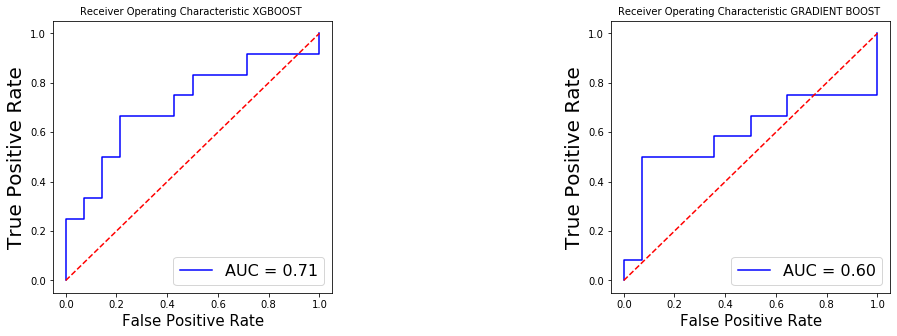

In [347]:
# XGBOOST ROC/ AUC , BEST MODEL
from sklearn import metrics
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=10)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)


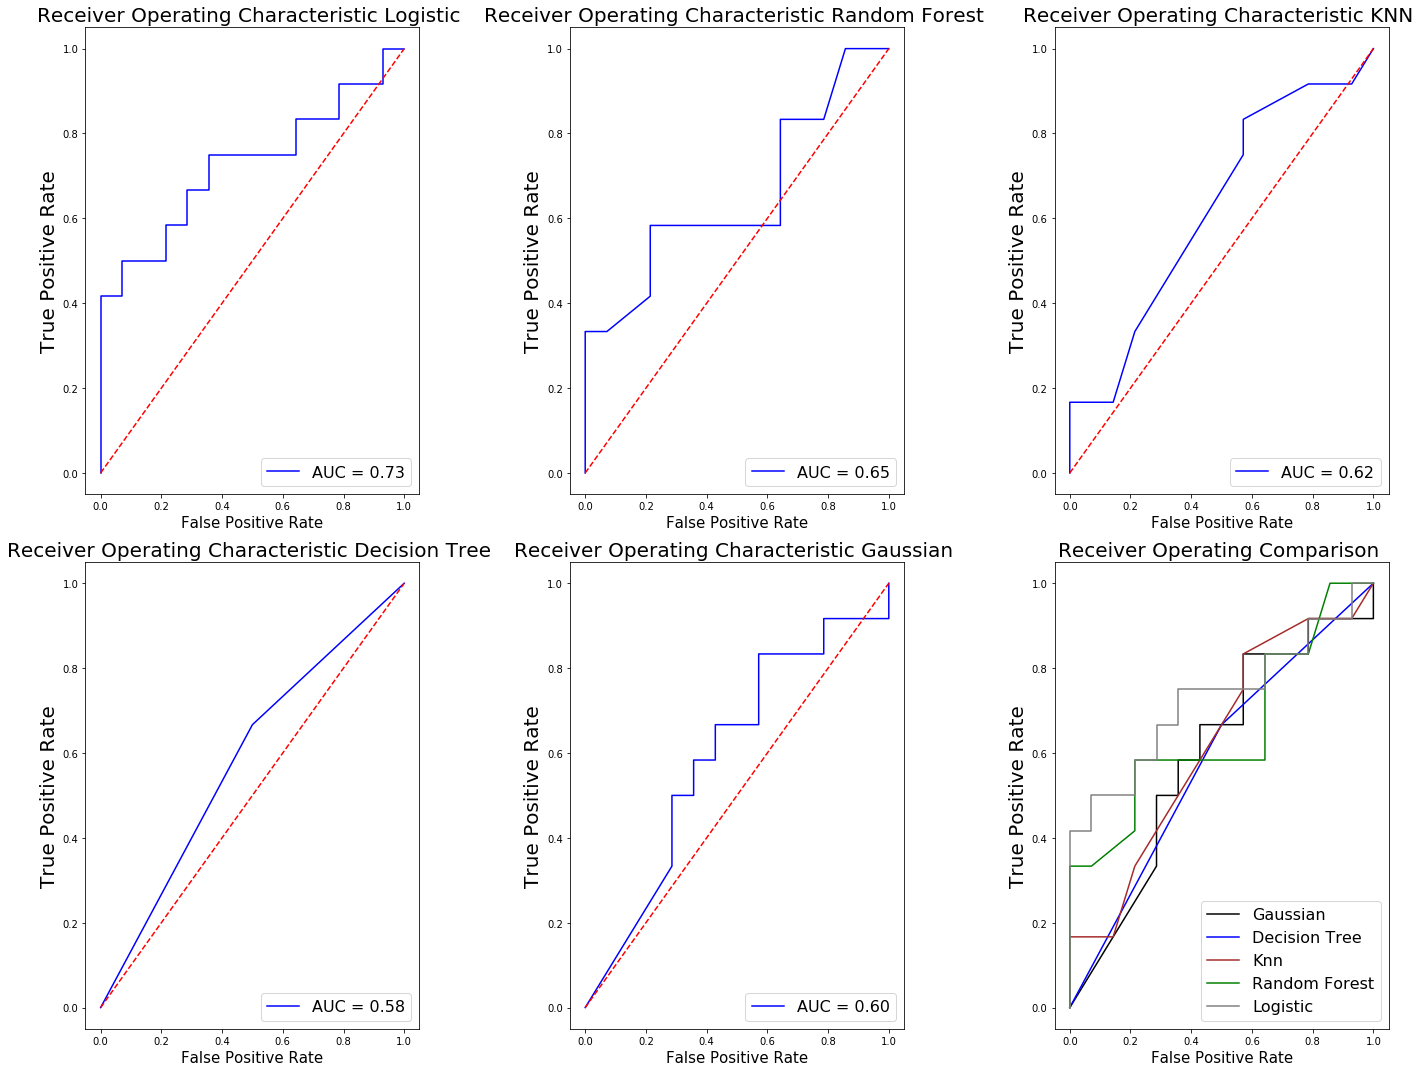

In [348]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

### Final Prediction

In [350]:
test = test.iloc[:, 1:]
test.head()

,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,FNC10,FNC11,FNC12,FNC13,FNC14,FNC15,FNC16,FNC17,FNC18,FNC19,FNC20,FNC21,FNC22,FNC23,FNC24,FNC25,FNC26,FNC27,FNC28,FNC29,FNC30,FNC31,FNC32,FNC33,FNC34,FNC35,FNC36,FNC37,FNC38,FNC39,FNC40,...,FNC371,FNC372,FNC373,FNC374,FNC375,FNC376,FNC377,FNC378,SBM_map1,SBM_map2,SBM_map3,SBM_map4,SBM_map5,SBM_map6,SBM_map7,SBM_map8,SBM_map10,SBM_map13,SBM_map17,SBM_map22,SBM_map26,SBM_map28,SBM_map32,SBM_map36,SBM_map40,SBM_map43,SBM_map45,SBM_map48,SBM_map51,SBM_map52,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
0,0.476127,0.064466,0.053238,-0.608133,0.073988,-0.637039,0.113556,-0.192434,-0.004025,-0.060474,-0.256244,-0.239706,0.113166,-0.136103,-0.322507,0.299439,0.492948,0.233049,-0.312542,0.210541,-0.521582,0.323302,-0.161545,-0.122164,0.369105,0.640831,0.041661,0.196605,0.128142,0.304551,0.352879,0.416197,0.678723,0.277782,0.676364,-0.133499,0.102174,0.022148,0.136891,0.317406,...,-0.034251,-0.103903,-0.497701,0.079286,0.265937,0.379066,-0.630483,-0.309032,1.154881,3.627246,0.146076,-0.677521,0.951169,0.482531,-2.404130,-0.715182,-0.475299,-0.896095,2.256762,0.567271,0.796897,-0.617875,0.616627,-2.011786,-0.514364,-0.000241,0.025560,-0.184531,-0.538563,0.139369,-0.451994,1.123770,2.083006,1.145440,-0.067608,1.202529,0.851587,0.451583,-0.159739,0.192076
1,0.013833,0.267183,0.232178,-0.167151,-0.261327,0.191869,0.406493,0.088761,0.177048,0.036718,-0.656346,0.415506,-0.054457,-0.401238,-0.321115,0.186433,0.585713,0.437911,-0.307749,-0.029330,-0.134603,-0.289691,0.009930,0.603237,-0.005077,0.381680,-0.135795,0.187608,0.716543,0.315034,-0.408325,0.617800,0.770686,0.181813,0.787717,0.605197,0.366940,-0.299074,0.421012,0.699394,...,0.503947,-0.221215,-0.949426,0.340575,0.767685,0.417164,0.194081,-0.218685,-1.608977,-0.125656,2.232224,1.013575,1.227375,0.296077,-0.612468,-1.610222,-0.136698,0.039142,1.711094,0.908302,-0.930560,-0.900517,-0.865214,0.185261,0.726653,1.492725,-1.508538,1.732360,4.317689,-2.084801,0.696987,1.397832,1.046136,-0.191733,-2.192023,-0.369276,0.822225,-0.109342,-0.580476,0.174160
2,-0.435452,0.046780,0.243742,0.397030,-0.147821,0.173620,-0.461963,-0.610736,0.419753,0.400985,-0.220077,0.287517,0.002372,-0.332512,0.008532,0.366046,0.562904,0.238146,0.014265,-0.425968,-0.499350,0.067169,0.292784,0.211195,0.563133,0.231455,-0.313893,0.561810,-0.012589,-0.108333,0.608448,0.309184,-0.058818,0.137444,0.316538,0.058696,0.081580,0.113453,-0.623393,-0.050571,...,0.759901,0.478927,-0.164136,-0.096020,0.607880,0.099879,-0.429554,0.453645,1.611464,1.859449,-0.959714,-0.713587,0.826513,-0.405989,-0.752907,-0.484180,-1.212576,0.679237,1.386814,0.974427,-0.362832,0.106783,-0.136973,-0.123830,0.589357,0.867600,2.357174,-1.374768,-1.572011,0.046525,0.160145,1.906989,-2.661633,-0.193911,0.440873,0.641739,0.918397,-0.758046,0.154702,-0.476647
3,-0.204510,-0.036735,-0.760705,-0.740495,0.064668,0.349926,-0.273826,-0.174384,-0.120248,0.175618,-0.122505,0.379375,0.040945,0.106041,-0.150561,0.114257,0.553867,-0.371839,-0.495213,-0.274343,-0.496839,0.405451,0.293438,0.546172,-0.355862,-0.053801,-0.492059,0.082710,0.113686,0.675230,-0.263651,0.451183,0.537128,-0.226750,0.124338,0.304847,0.073727,0.278834,0.279822,0.161171,...,0.001855,0.324120,-0.212088,0.344033,0.234451,0.214809,-0.138947,0.436006,-0.283111,-0.418010,1.962834,-0.342130,-0.939108,0.929705,1.041755,-1.073416,-0.815344,-1.945322,-0.949757,1.275905,-1.389023,0.561610,2.226175,0.167515,0.375615,-0.318241,-2.162269,-0.135170,0.553775,-1.693663,0.974828,-1.997087,-2.083782,1.154107,-0.643947,2.332424,0.659124,-0.809445,0.558960,2.790871
4,0.599435,-0.166441,0.122431,0.011539,0.346906,-0.017430,-0.274734,0.211510,0.151012,-0.033434,-0.286008,-0.024012,-0.245284,-0.280592,-0.278775,0.555220,-0.241175,-0.184943,0.558418,-0.313958,0.044287,0.554710,0.249658,0.594015,-0.245845,-0.426244,0.252298,0.023092,0.672685,0.624100,0.080206,0.622279,0.294196,0.088422,0.332166,0.467401,0.447499,0.264495,

In [0]:
logpred = logmodel.predict(test)

In [366]:
df = pd.DataFrame(logpred)
df.head()

,0
0,0
1,0
2,0
3,0
4,0


### ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**
- False Positive, I'll add more flesh here.
- False Negative, I'll add more flesh here.

**In my opinion:**
- I'll add more flesh here.

### So, our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.
- Obs1 - lets go back and look the best confusion matrix that attend this criteria
- Obs2 - i'll do the math manualy to be more visible and understanding

In [0]:
from sklearn.metrics import classification_report

In [225]:
print('Logistic Regresion Confusion Matrix\n', confusion_matrix(y_test, logpred))

Logistic Regresion Confusion Matrix
 [[9 5]
 [3 9]]


In [226]:
print('Logistic Regresion Reports\n',classification_report(y_test, logpred))

Logistic Regresion Reports
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.64      0.75      0.69        12

    accuracy                           0.69        26
   macro avg       0.70      0.70      0.69        26
weighted avg       0.70      0.69      0.69        26



##### Recall - Specificity #####
TN / (TN + FP) [ MATRIX LINE 1 ]

 - For all NEGATIVE(0) **REAL** VALUES how much we predict correct ?


##### Recall - Sensitivity #####
TP / (TP + FN) [ MATRIX LINE 2 ]

 - For all POSITIVE(1) **REAL** VALUES how much we predict correct ?

##### Precision  #####
TN / (TN + FN) [ MATRIX COLUMN 1 ]

- For all NEGATIVE(0) **PREDICTIONS** by our model, how much we predict correct ?

##### Precision  #####
TN / (TN + FN) [ MATRIX COLUMN 1 ]

- For all POSITIVE(1) **PREDICTIONS** by our model, how much we predict correct ?

##### F1-SCORE #####
- F1-Score is a "median" of Recall and Precision, consider this when you want a balance between this metrics

F1 = 2(*Precision(0) * Recall(0)) / (Precision(0) + Recall(0))